In [1]:
# Author - Sandip Datta
# Nov - 2016

# Project2 - Policy Segmentation - Clustering States on Insurance Policy Face Amounts

# Policy Segmentation 
Cluster States with Highest\Medium\Least Face Amounts of various types of Insurance policies
	Input is – Incurred Insurance policy amount for different types of Insurance policy categories in different states in US. 
	With Machine Learning cluster them into different groups based on based on amount incurred 


# Meta Data - 
STATE 	
National Service Life Insurance	
Service-Disabled Veterans' Insurance	
United States Government Life Insurance	
Veterans' Mortgage Life Insurance	
Veterans' Reopened Insurance	
Veterans' Special Life Insurance	
Total

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:

data = pd.read_csv('Face_Amount_by_Program_by_State_August_2011.csv',
                  dtype={'STATE': str,
                           'NationalServiceLifeInsurance':str,
                           'ServiceDisabledVeteransInsurance':str,
                           'UnitedStatesGovernmentLifeInsurance':str,
                           'VeteransMortgageLifeInsurance':str,
                           'VeteransReopenedInsurance':str,
                           'VeteransSpecialLifeInsurance':str,
                           'Total':str                          
                          }
                  )

data.head(3)

,STATE,NationalServiceLifeInsurance,Service-DisabledVeteransInsurance,UnitedStatesGovernmentLifeInsurance,VeteransMortgageLifeInsurance,VeteransReopenedInsurance,VeteransSpecialLifeInsurance,Total
0,Alabama,"107,706,116.00","58,178,149.00","86,000.00","3,117,592.00","2,893,710.00","23,641,639.00","195,623,206.00"
1,Alaska,"11,580,784.00","4,529,500.00","6,000.00","180,000.00","202,746.00","2,734,900.00","19,233,930.00"
2,American Samoa,"5,000.00","1,190,000.00",,,,"43,375.00","1,238,375.00"


# Data Inspection

In [36]:
#feature_cols = ["NSLI","SDVI","USGLI","VMLI","VRI","VSLI","Total"]
#data.rename(columns={"National Service Life Insurance":"NSLI"})

In [37]:
#data.info()

In [38]:
#data.dtypes

In [39]:
#data.describe()

In [40]:
data.head(2)

,STATE,NationalServiceLifeInsurance,Service-DisabledVeteransInsurance,UnitedStatesGovernmentLifeInsurance,VeteransMortgageLifeInsurance,VeteransReopenedInsurance,VeteransSpecialLifeInsurance,Total
0,Alabama,"107,706,116.00","58,178,149.00","86,000.00","3,117,592.00","2,893,710.00","23,641,639.00","195,623,206.00"
1,Alaska,"11,580,784.00","4,529,500.00","6,000.00","180,000.00","202,746.00","2,734,900.00","19,233,930.00"


# Data Handling\Correction

In [41]:
# Replace all field having value as spaces with Zeros
# Change Blank columns to 0
data = data.replace(r'\s\s\s+',0,regex=True)

# Change - 89,000.00 to 89000.00
data = data.replace(r'\,','',regex=True)

# Change - 89000.00 to 89000
data = data.replace(r'\.00','',regex=True)

data.head(2)

,STATE,NationalServiceLifeInsurance,Service-DisabledVeteransInsurance,UnitedStatesGovernmentLifeInsurance,VeteransMortgageLifeInsurance,VeteransReopenedInsurance,VeteransSpecialLifeInsurance,Total
0,Alabama,107706116,58178149,86000,3117592,2893710,23641639,195623206
1,Alaska,11580784,4529500,6000,180000,202746,2734900,19233930


In [42]:
# remove "Total" column . It contains total of each row values.
data_X = data.drop('Total',axis=1)

# remove the last row - "Total". This row contains total of individual columns.
data_X = data_X.drop(58,axis=0)

data_X.head(2)

,STATE,NationalServiceLifeInsurance,Service-DisabledVeteransInsurance,UnitedStatesGovernmentLifeInsurance,VeteransMortgageLifeInsurance,VeteransReopenedInsurance,VeteransSpecialLifeInsurance
0,Alabama,107706116,58178149,86000,3117592,2893710,23641639
1,Alaska,11580784,4529500,6000,180000,202746,2734900


In [43]:
X = data_X[['NationalServiceLifeInsurance','Service-DisabledVeteransInsurance',
            'UnitedStatesGovernmentLifeInsurance','VeteransMortgageLifeInsurance',
            'VeteransReopenedInsurance','VeteransSpecialLifeInsurance'
           ]]
#X_state = data_X['STATE']

# K-Means Clustering

In [44]:
# K-Means Clustering 
from sklearn.cluster import KMeans
from sklearn import metrics


# We will verify our model against a range of clusters - [2 - 10].
# To decide optimal no of clusters i.e. k value
k_values = range(2,20,1)

sil_score_all = []

for k in k_values: 
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(X)
    
    # Silhoutte coefficient
    sil_score = metrics.silhouette_score(X,kmeansModel.labels_,metric='euclidean')
    sil_score_all.append(sil_score)
    

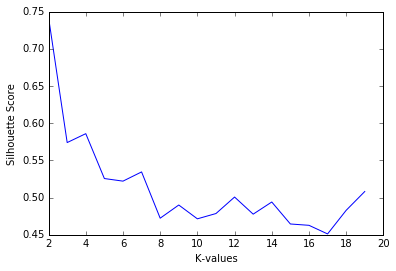

In [45]:
plt.plot(k_values,sil_score_all)
plt.xlabel("K-values")
plt.ylabel("Silhouette Score")

In [46]:
# This contains the cluster no. given to each row in the dataset
#kmeansModel.labels_

In [47]:
#kmeansModel.predict(X)

In [48]:
#kmeansModel.cluster_centers_

# Hierarchial Clustering

In [49]:
'''
The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: 
each observation starts in its own cluster, and clusters are successively merged together.
'''
from sklearn.cluster import AgglomerativeClustering

# We will verify our model against a range of clusters - [2 - 10].
# To decide optimal no of clusters i.e. k value
k_values = range(2,20,1)

sil_score_all = []

for k in k_values: 
    wardHierarModel = AgglomerativeClustering(n_clusters=k, linkage='ward')
    wardHierarModel.fit(X)
    
    # Silhoutte coefficient
    sil_score = metrics.silhouette_score(X,wardHierarModel.labels_,metric='euclidean')
    sil_score_all.append(sil_score)
    

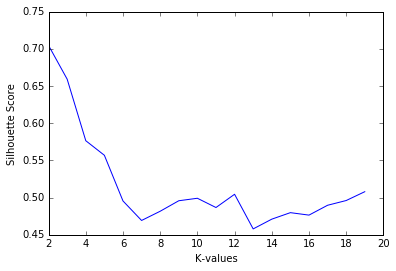

In [50]:
plt.plot(k_values,sil_score_all)
plt.xlabel("K-values")
plt.ylabel("Silhouette Score")

# DBSCAN Clustering

In [51]:

# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN

# We will verify our model against a range of clusters - [2 - 10].
# To decide optimal no of clusters i.e. k value
k_values = range(2,20,1)

#sil_score_all = []

dbscanModel = DBSCAN(eps=1,min_samples=3)
dbscanModel.fit(X_scaled)
    
# Silhoutte coefficient
sil_score = metrics.silhouette_score(X_scaled,dbscanModel.labels_)
#sil_score_all.append(sil_score)

In [53]:
labels = dbscanModel.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) #- (1 if -1 in labels else 0)

In [54]:
n_clusters_
#sil_score

2

In [55]:
labels

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [56]:
sil_score

0.60264402447288956

# Comparison

In [57]:
kmeansModel = KMeans(n_clusters=2)
kmeansModel.fit(X)
y_pred = kmeansModel.labels_

# The Cluster assignment

In [58]:
# The Cluster assignment for each US State
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

# Visualization

In [59]:
# Lets visualize the clusters

In [60]:
# remove "Total" column . It contains total of each row values.
data_X = data.drop('Total',axis=1)

# remove the last row - "Total". This row contains total of individual columns.
data_X = data_X.drop(58,axis=0)

data_X.head(3)

,STATE,NationalServiceLifeInsurance,Service-DisabledVeteransInsurance,UnitedStatesGovernmentLifeInsurance,VeteransMortgageLifeInsurance,VeteransReopenedInsurance,VeteransSpecialLifeInsurance
0,Alabama,107706116,58178149,86000,3117592,2893710,23641639
1,Alaska,11580784,4529500,6000,180000,202746,2734900
2,American Samoa,5000,1190000,0,0,0,43375


In [61]:
colors = np.array(['r','y'])
#data.head(2)

x1 = data_X["NationalServiceLifeInsurance"].values.astype(np.float)
x2 = data_X["Service-DisabledVeteransInsurance"].values.astype(np.float)
x3 = data_X["UnitedStatesGovernmentLifeInsurance"].values.astype(np.float)

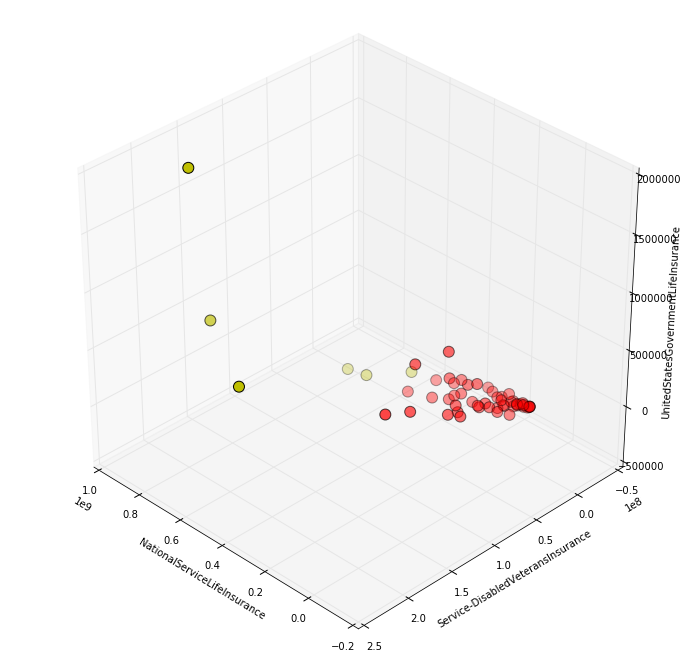

In [62]:
from mpl_toolkits.mplot3d import Axes3D

plt.suptitle('3d plot', fontsize=15)

ax = Axes3D(plt.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=35, azim=135)
ax.scatter(x1[:], x2[:], x3[:], c = colors[y_pred], s=120)

ax.set_xlabel('NationalServiceLifeInsurance')
ax.set_ylabel('Service-DisabledVeteransInsurance')
ax.set_zlabel('UnitedStatesGovernmentLifeInsurance')


In [63]:
import matplotlib.pyplot as plt

%matplotlib inline

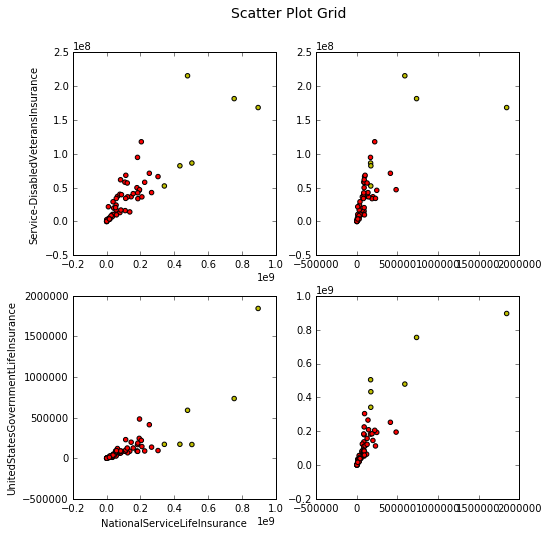

In [64]:
# Option #1: Scatter Plot Grid
plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)

# Upper Left
plt.subplot(221)   # GridTotalNoOfRows, GridTotalNoOfColumns, plot_position
plt.scatter(x1[:], x2[:], c = colors[y_pred])
plt.ylabel("Service-DisabledVeteransInsurance")


# Lower Left
plt.subplot(223)
plt.scatter(x1[:], x3[:], c = colors[y_pred])
plt.ylabel("UnitedStatesGovernmentLifeInsurance")
plt.xlabel("NationalServiceLifeInsurance")



# Upper Right
plt.subplot(222)
plt.scatter(x3[:], x2[:], c = colors[y_pred])



# Lower Right
plt.subplot(224)
plt.scatter(x3[:], x1[:], c = colors[y_pred])

plt.show()
